# 타이타닉 생존자 예측 문제 데이터의 전처리 실습

In [64]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
# 그래프 한글 처리하는 코드
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': 
    # 윈도우   
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


In [9]:
data = pd.read_csv('./data/titanic.csv')
data.shape
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# 사본 사용
df = data.copy()

## 데이터 기본 정보 확인
- info를 사용
- 컬럼명, 컬럼수, 샘플수 파악한다
- 카테고리형 타입과 숫자형 타입(int, float)
- 숫자형도 연속적인 값인 아날로그 데이터인지 카테고리형 데이터인지 확인

In [13]:
df.info()
# sample 개수가 다른 변수가 존재 : 결측치가 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

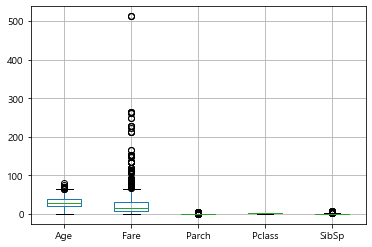

In [16]:
df[df.columns.difference(['PassengerId','Survived'])].boxplot()

## 결측치 제거
- 특정 컬럼에 결측치가 너무 많은 경우 컬럼 자체를 사용하지 않는 경우도 있음

In [18]:
# 컬럼별 결측치 개수
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Embarked -> 대체할만한 대표값이 없거니와 결측치가 많지 않아 행 삭제

In [20]:
df = df[~df['Embarked'].isnull()]
df.shape # 891 -> 889

(889, 12)

In [ ]:
# Cabin -> 객실 종류 : 146 / 결측치 : 687
# 데이터의 특성 상 사용하지 않는 것으로
# name으로 생존여부 예측 불가능 -> 사용하지 않는 걸로

In [24]:
print('Cabin  결측치 수 : ', df.Cabin.isnull().sum())
print('Cabin 종류 : ', len(df.Cabin.value_counts())) # 캐빈의 종류 : 146

Cabin  결측치 수 :  687
Cabin 종류 :  146


In [ ]:
# Age는 결측치 177개 # 생존에 영향을 미치는 의미있는 정보로 판단되므로 다른 값으로 대체

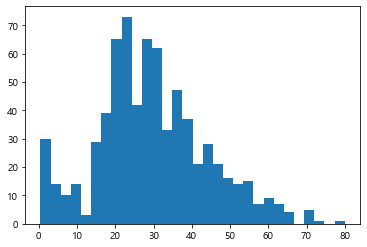

In [26]:
# 나이 데이터 분포 확인
plt.hist(df.Age, bins=30)
plt.show()

In [28]:
# 나이 평균
df.Age.mean()
df['Age'].mean()

29.64209269662921

In [33]:
# 결측치를 평균 나이로 대체
df.Age.fillna(df.Age.mean(), inplace=True)
df.Age.isnull().sum()

C:\Users\choi yeseul\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


0

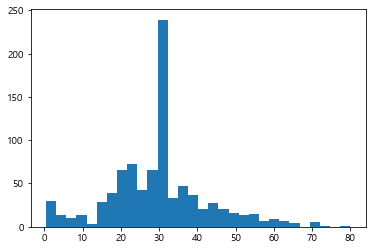

In [34]:
plt.hist(df.Age, bins=30)
plt.show()

## 데이터 변환
- 카테고리 변수와 수치형 변수를 나누어서 처리
- 카테고리 변수는 일반적으로 원핫인코딩으로 표현
- 수치형의 아날로그 변수는 로그변환이 역수변화등을 하거나
- 카테고리 변수 인 경우 카테고리 변환 후 원핫인코딩을 진행하기도 한다

In [ ]:
# 카테고리 변수 : 선실변수, 티켓등급, 성별, 승선항 항구 -> 원핫 인코딩으로 변환

In [36]:
# 선실 등근 비율
df.Pclass.value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [ ]:
# 원 핫 인코딩으로 변환

In [38]:
df_class = pd.get_dummies(df['Pclass'], prefix='Class') # prefix 열이름에 붙이는 이름
df_class.head()

,Class_1,Class_2,Class_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [60]:
df_sex = pd.get_dummies(df['Sex'])
df_sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [40]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [41]:
df_emb = pd.get_dummies(df['Embarked'], prefix="Embarked")
df_emb

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [42]:
# 티켓명 -> 680개로 분석과 상관 없어보임
df.Ticket.value_counts()

347082      7
1601        7
CA. 2343    7
CA 2144     6
3101295     6
           ..
374746      1
3101267     1
113059      1
PC 17483    1
370369      1
Name: Ticket, Length: 680, dtype: int64

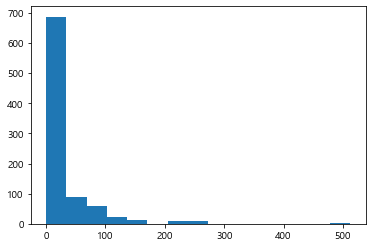

In [51]:
plt.hist(df.Fare, bins=15)
plt.show()
# 한쪽으로 치우쳐저 있음
# 특히 돈은 로그 변환을 하는 경우가 대부분

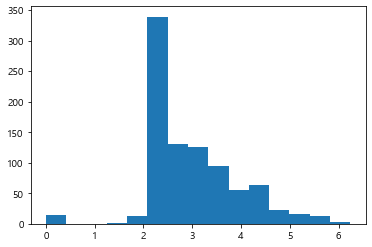

In [52]:
# 이를 통헤 선형적인 값으로 변환 & 정규분포처럼 보이도록
# fare 변수의 min 값 = 0 -> log시 무한대로 오류가 남
# sp, +1를 해서 무임승선인 경우 1달러 치환
plt.hist(np.log(df.Fare+1), bins=15)
plt.show()

In [ ]:
# 형제/배우자, 부모 자녀수 기타 변수는

In [53]:
df.SibSp.value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [54]:
df.Parch.value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [55]:
# 컬럼 취합
X = df[['Age','SibSp','Parch','Fare']]

In [56]:
X.head()

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


In [58]:
# 요금 로그 변환값을 사용 ( +1 도 해주기)
X.Fare = np.log(X.Fare + 0.1)
X.head()

C:\Users\choi yeseul\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\choi yeseul\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Age,SibSp,Parch,Fare
0,22.0,1,0,0.739410
1,38.0,1,0,1.474320
2,26.0,0,0,0.780499
3,35.0,1,0,1.404640
4,35.0,0,0,0.787556


In [62]:
# 원핫 인코딩된 카테고리 변수 컬럼을 가로로 변환
X = pd.concat([X,df_emb,df_class,df_sex],axis =1)
X.head()

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,female,male,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,female,male
0,22.0,1,0,0.739410,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1
1,38.0,1,0,1.474320,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0
2,26.0,0,0,0.780499,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0
3,35.0,1,0,1.404640,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0
4,35.0,0,0,0.787556,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1
